In [1]:
%%capture
import warnings
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated.*', category=FutureWarning)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('DSGames/Games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df.rename(columns = {'Year_of_Release':'Year'}, inplace = True)
df.rename(columns = {'NA_Sales':'NA'}, inplace = True)
df.rename(columns = {'EU_Sales':'EU'}, inplace = True)
df.rename(columns = {'JP_Sales':'JP'}, inplace = True)
df.rename(columns = {'Other_Sales':'Other'}, inplace = True)
df.rename(columns = {'Global_Sales':'Global'}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Year          16450 non-null  float64
 3   Genre         16717 non-null  object 
 4   Publisher     16665 non-null  object 
 5   NA            16719 non-null  float64
 6   EU            16719 non-null  float64
 7   JP            16719 non-null  float64
 8   Other         16719 non-null  float64
 9   Global        16719 non-null  float64
 10  Critic_Score  8137 non-null   float64
 11  Critic_Count  8137 non-null   float64
 12  User_Score    10015 non-null  object 
 13  User_Count    7590 non-null   float64
 14  Developer     10096 non-null  object 
 15  Rating        9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df = df.dropna(how='any', subset=['Platform','Year'])


In [8]:
for el in  ['Platform', 'Genre']:
    df[el] = df[el].astype('category')
df['Year'] = df['Year'].astype('int64')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16448 non-null  object  
 1   Platform      16450 non-null  category
 2   Year          16450 non-null  int64   
 3   Genre         16448 non-null  category
 4   Publisher     16418 non-null  object  
 5   NA            16450 non-null  float64 
 6   EU            16450 non-null  float64 
 7   JP            16450 non-null  float64 
 8   Other         16450 non-null  float64 
 9   Global        16450 non-null  float64 
 10  Critic_Score  7983 non-null   float64 
 11  Critic_Count  7983 non-null   float64 
 12  User_Score    7463 non-null   float64 
 13  User_Count    7463 non-null   float64 
 14  Developer     9907 non-null   object  
 15  Rating        9769 non-null   object  
dtypes: category(2), float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16448 non-null  object  
 1   Platform      16450 non-null  category
 2   Year          16450 non-null  int64   
 3   Genre         16448 non-null  category
 4   Publisher     16418 non-null  object  
 5   NA            16450 non-null  float64 
 6   EU            16450 non-null  float64 
 7   JP            16450 non-null  float64 
 8   Other         16450 non-null  float64 
 9   Global        16450 non-null  float64 
 10  Critic_Score  7983 non-null   float64 
 11  Critic_Count  7983 non-null   float64 
 12  User_Score    7463 non-null   float64 
 13  User_Count    7463 non-null   float64 
 14  Developer     9907 non-null   object  
 15  Rating        9769 non-null   object  
dtypes: category(2), float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [10]:
df.dtypes

Name              object
Platform        category
Year               int64
Genre           category
Publisher         object
NA               float64
EU               float64
JP               float64
Other            float64
Global           float64
Critic_Score     float64
Critic_Count     float64
User_Score       float64
User_Count       float64
Developer         object
Rating            object
dtype: object

In [11]:
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.487356,0.264041,0.145909,0.078464,0.047582,0.536252,68.994363,26.441313,7.126330,163.015141
std,5.878995,0.818324,0.506639,0.311046,0.187973,1.558437,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [13]:
df.columns = df.columns.str.strip()

In [14]:
df.isnull().sum()

Name               2
Platform           0
Year               0
Genre              2
Publisher         32
NA                 0
EU                 0
JP                 0
Other              0
Global             0
Critic_Score    8467
Critic_Count    8467
User_Score      8987
User_Count      8987
Developer       6543
Rating          6681
dtype: int64

In [15]:
df.drop(df.index[659],inplace = True)
df.drop(df.index[14245],inplace = True)
df.dropna(axis = 0, inplace = True)

In [16]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA              0
EU              0
JP              0
Other           0
Global          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   category
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  Critic_Count  6824 non-null   float64 
 12  User_Score    6824 non-null   float64 
 13  User_Count    6824 non-null   float64 
 14  Developer     6824 non-null   object  
 15  Rating        6824 non-null   object  
dtypes: category(2), float64(9), int64(1), object(4)
memory usage: 814.7+ KB


In [18]:
df.drop(['Developer','Rating'],axis = 1, inplace = True)
df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)

In [19]:
df['Name'].isnull().sum()

0

In [20]:

df.dtypes

Name              object
Platform        category
Year               int64
Genre           category
Publisher         object
NA               float64
EU               float64
JP               float64
Other            float64
Global           float64
Critic_Score     float64
User_Score       float64
dtype: object

In [21]:
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,User_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   category
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  User_Score    6824 non-null   float64 
dtypes: category(2), float64(7), int64(1), object(2)
memory usage: 601.4+ KB


In [23]:
df['Genre'] = df['Genre'].astype('str')

In [24]:
df_1= df.groupby(['Year'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()

In [25]:
evolved_sales = pd.melt(df_1, id_vars = 'Year',var_name = 'Region', value_name = 'Sales')

In [26]:
evolved_sales = evolved_sales.replace([np.inf, -np.inf], np.nan).dropna()

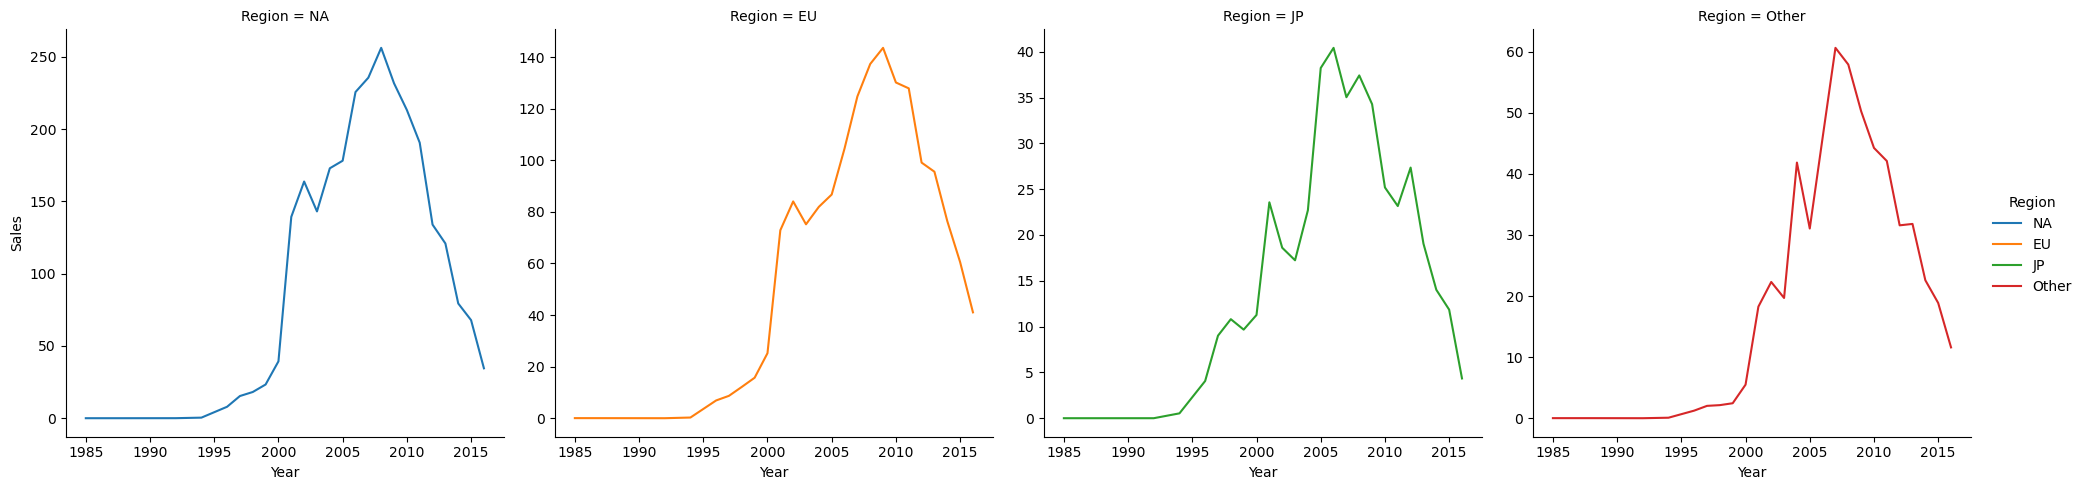

In [27]:
evolved_sales = evolved_sales[np.isfinite(evolved_sales['Year'])]
sns.relplot(x = 'Year', y = 'Sales', data = evolved_sales, hue = 'Region', col = 'Region', kind='line',facet_kws={"sharey": False} )


In [28]:
genre_sales = df.groupby(['Genre','Year'], observed=True)[['Global']].sum().reset_index()


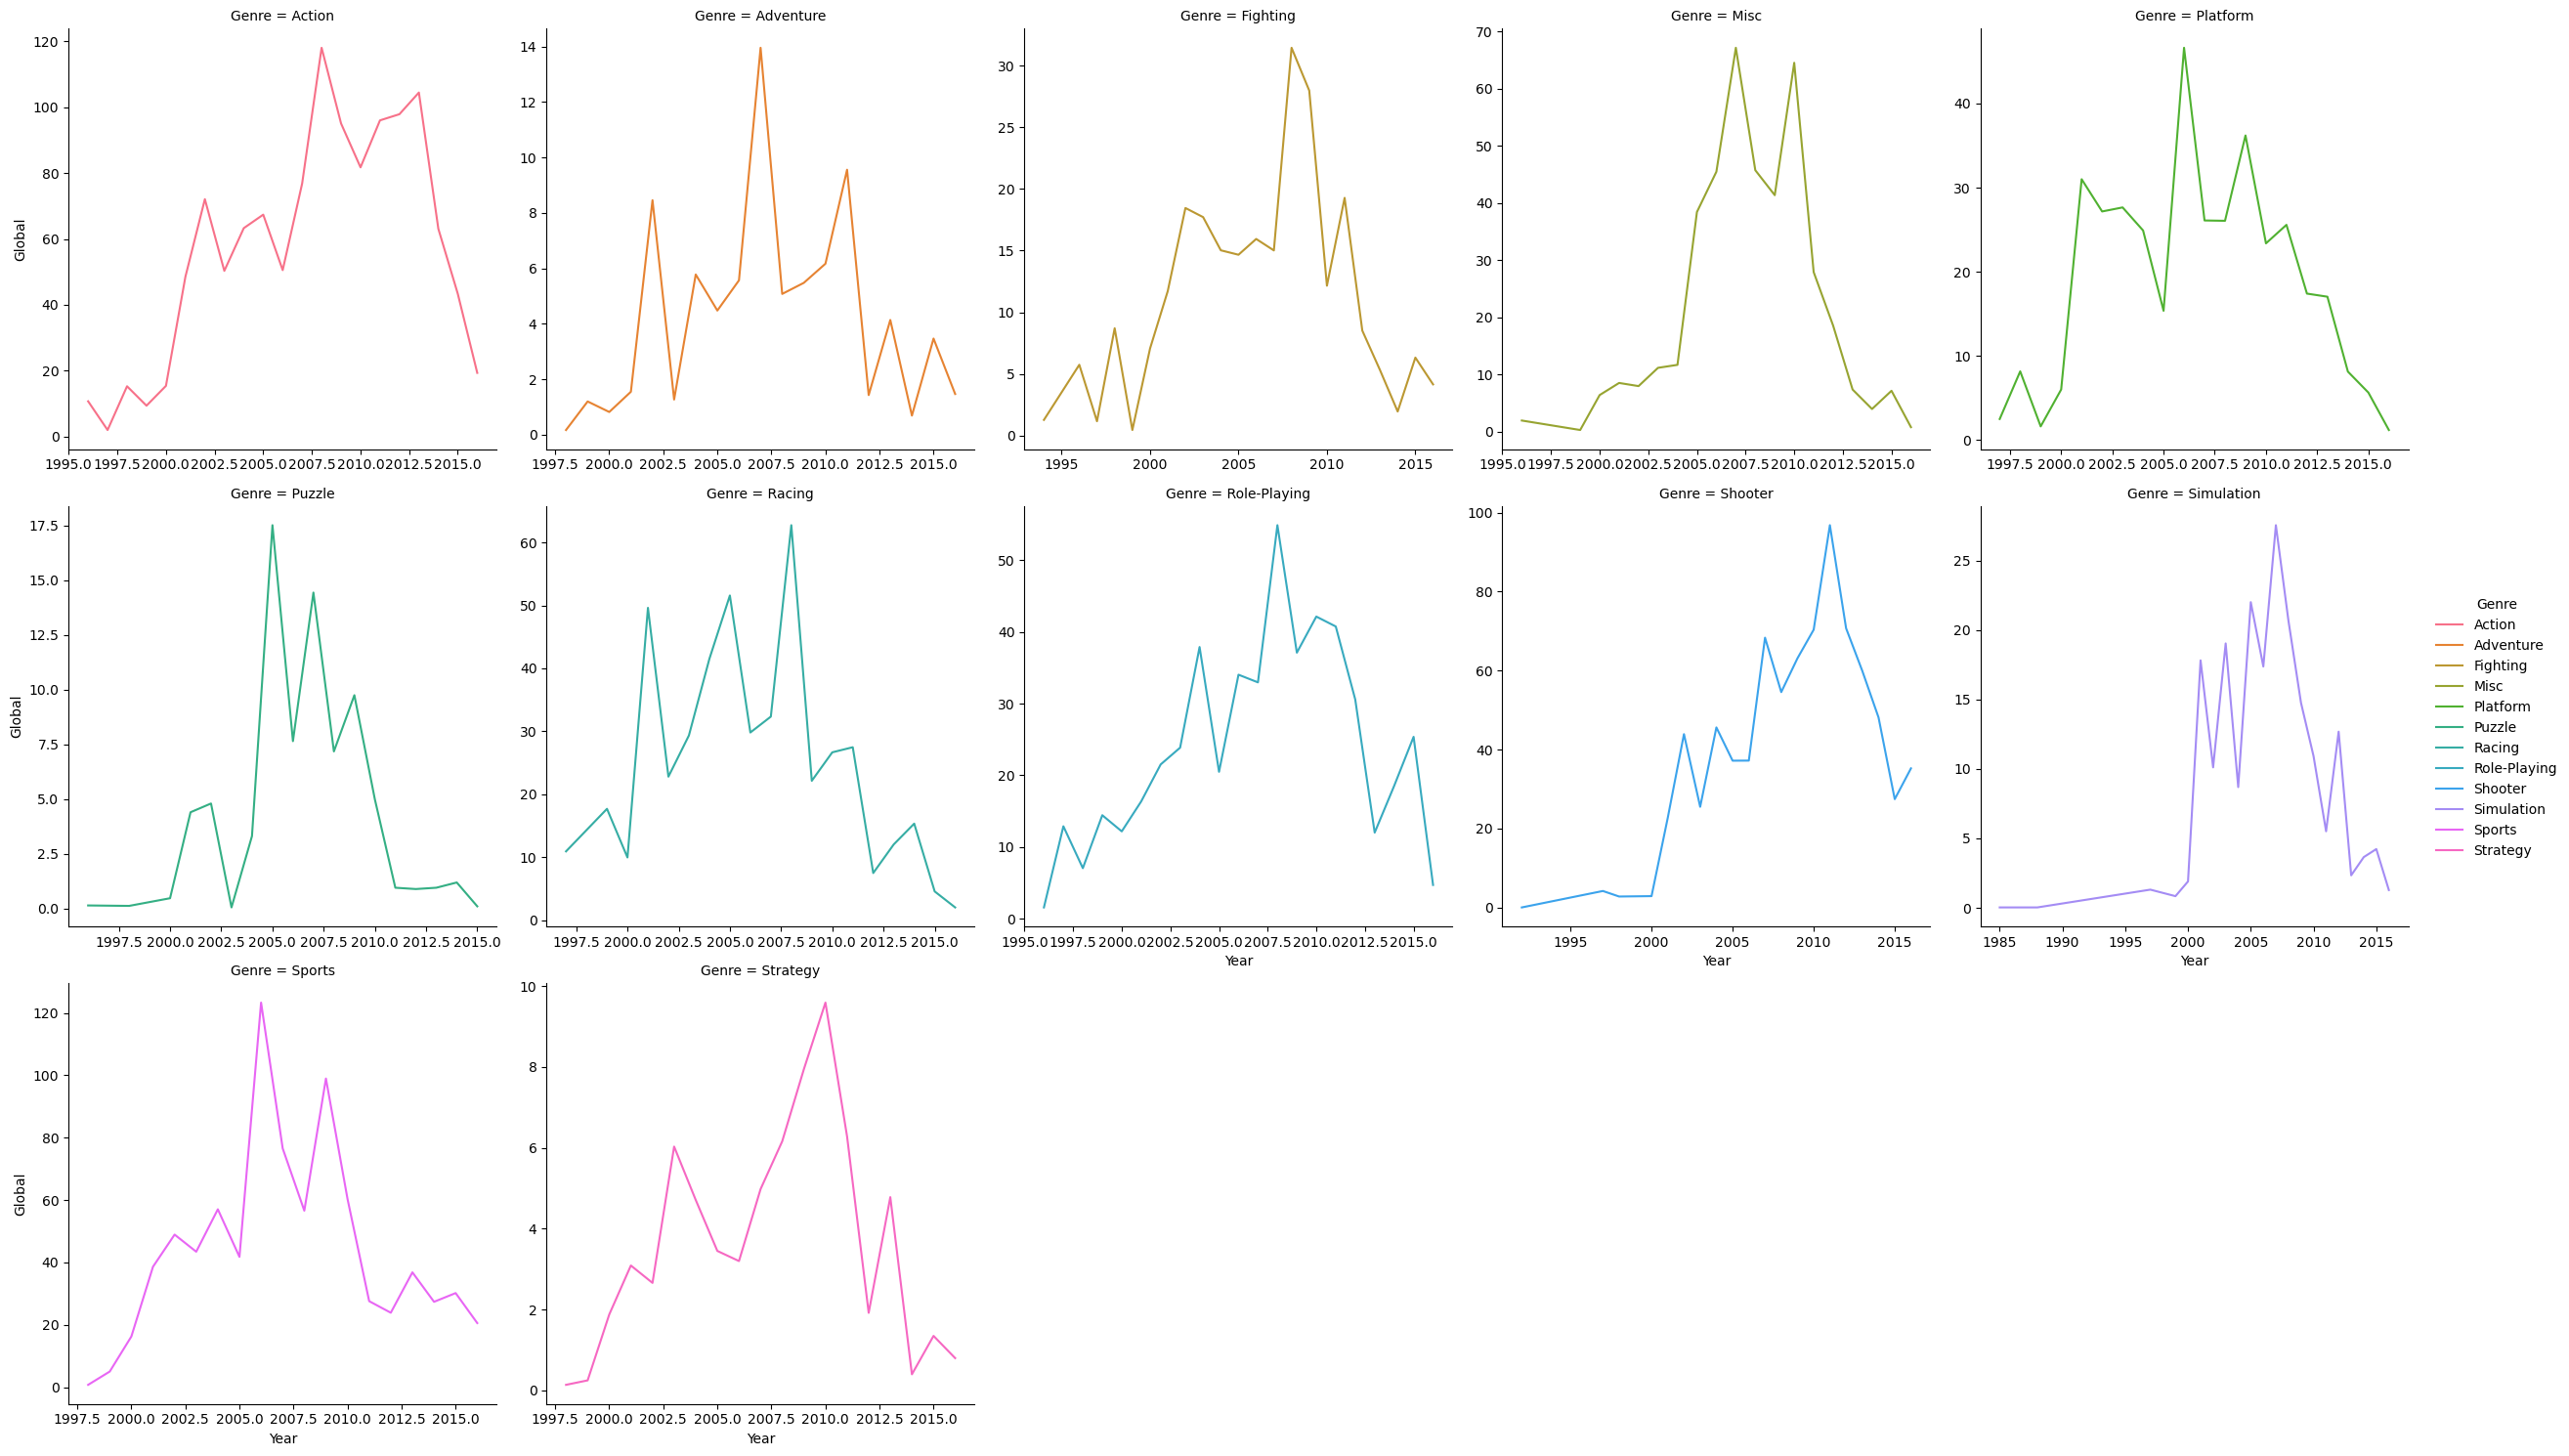

In [29]:
sns.relplot(data=genre_sales,  x="Year", y = 'Global',hue = 'Genre', col = 'Genre',kind = 'line', col_wrap=5,facet_kws={"sharex": False, "sharey": False} )

In [30]:
p_1 = df.groupby(['Platform','Year'], observed=True)[['Global']].sum().reset_index()
p_1['Platform'] = p_1['Platform'].astype(str).str.strip()

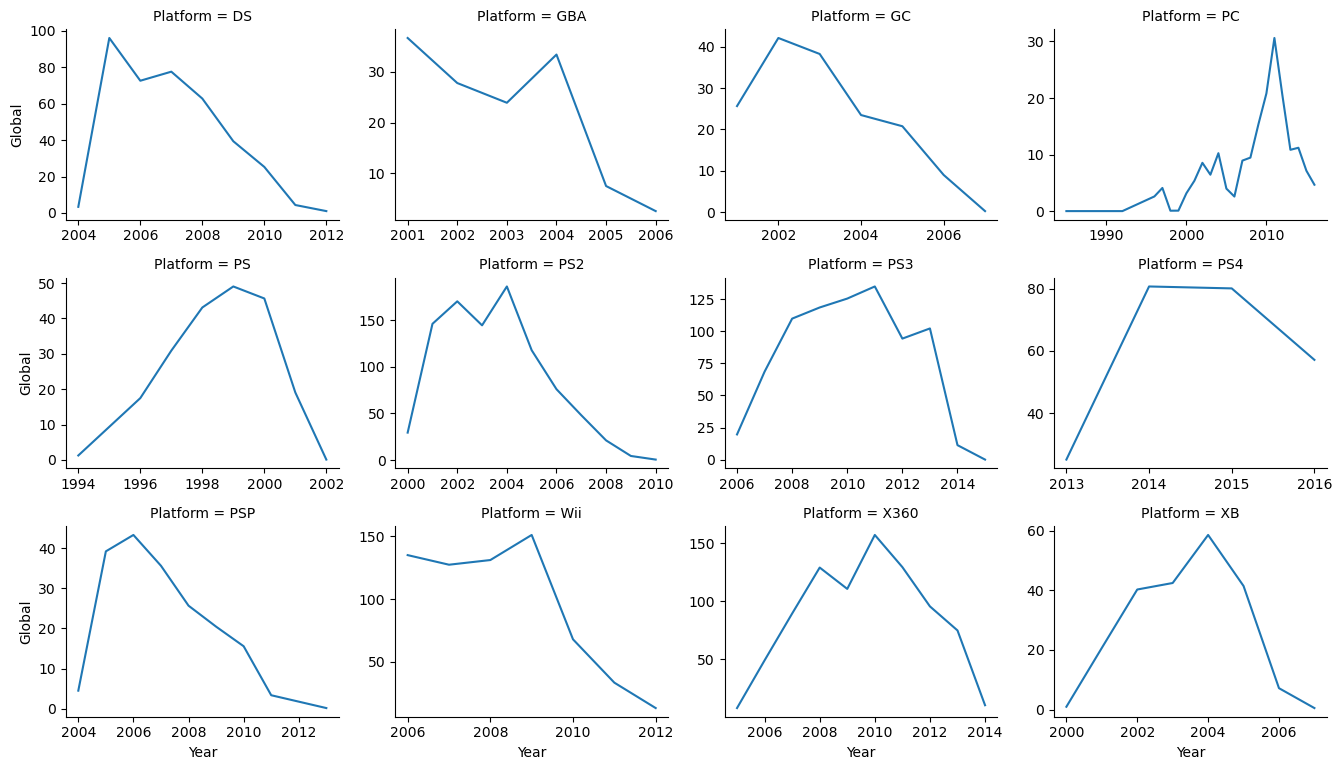

In [31]:
top_platform = df.groupby('Platform', observed=True)['Global'].sum().sort_values(ascending=False).head(12).index
top_platform = top_platform.tolist()
platform_sales = p_1[p_1['Platform'].isin(top_platform)]



g = sns.relplot(
    data=platform_sales, x='Year', y='Global',
    col='Platform', col_wrap=4, kind='line',
     facet_kws={"sharex": False, "sharey": False}, height=2.6, aspect=1.3
)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   object  
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  User_Score    6824 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(3)
memory usage: 647.7+ KB


In [33]:
grouped_preferences= df.groupby(['Year','Genre'], observed = True)[['NA', 'EU', 'JP', 'Other']].sum().reset_index()
melted_preferences = pd.melt(grouped_preferences, id_vars = ['Year','Genre'],var_name = 'Region', value_name = 'Sales')

In [34]:
genre = df[['Genre', 'Global']]

In [35]:
grouped_genre = genre.groupby(['Genre'])[['Global']].sum().reset_index()

In [36]:
top_genre = grouped_genre.groupby('Genre', observed = True)['Global'].sum().sort_values(ascending=False).head(5).index


In [37]:
genre_pref = melted_preferences[melted_preferences['Genre'].isin(top_genre)]

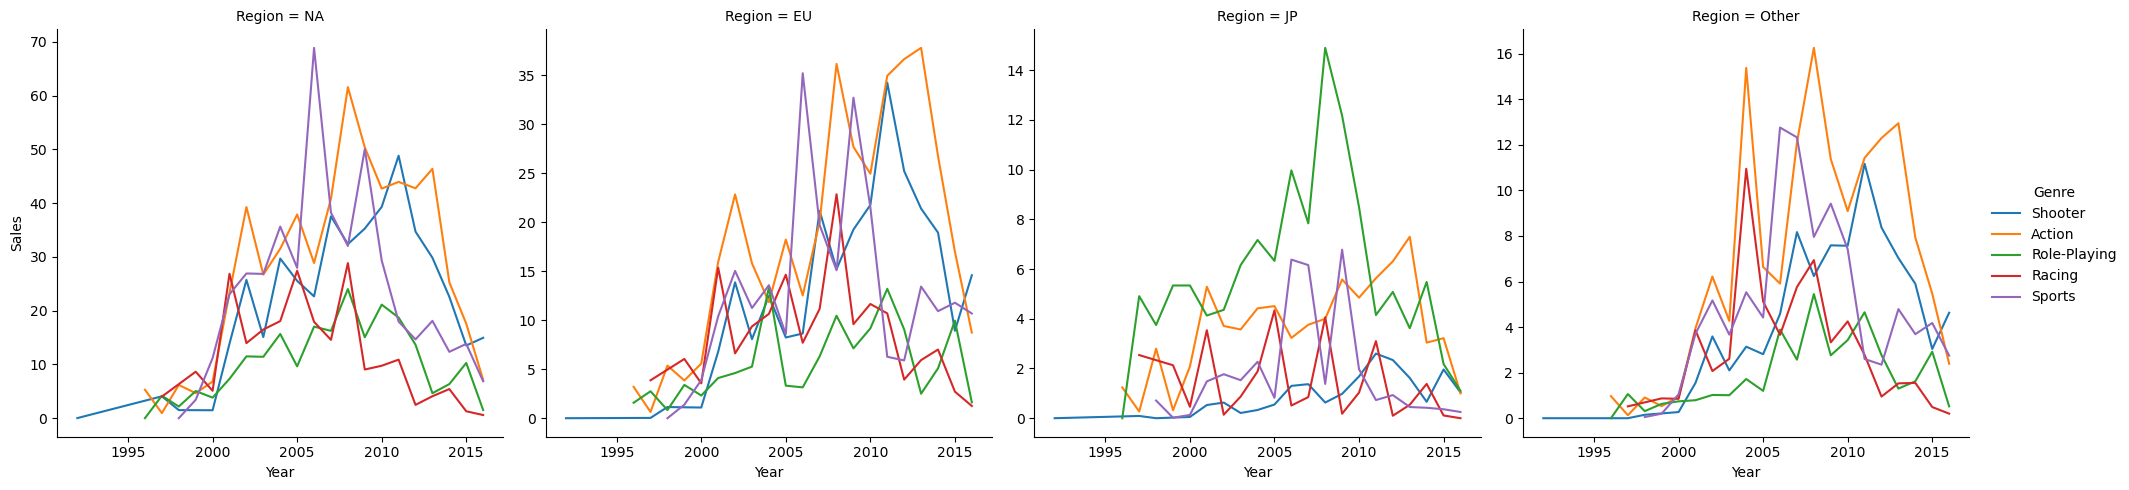

In [38]:
sns.relplot(x = 'Year', y = 'Sales', data = genre_pref, hue = 'Genre', col = 'Region', kind='line', facet_kws={'sharey': False, 'sharex': True})

In [39]:
critic = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [40]:
critic = critic.melt( id_vars = ['Critic_Score','Genre'],var_name = 'Region', value_name = 'Sales')

In [41]:
critic

,Critic_Score,Genre,Region,Sales
0,76.0,Sports,NA,41.36
1,82.0,Racing,NA,15.68
2,80.0,Sports,NA,15.61
3,89.0,Platform,NA,11.28
4,58.0,Misc,NA,13.96
...,...,...,...,...
27291,46.0,Action,Other,0.00
27292,81.0,Fighting,Other,0.00
27293,80.0,Action,Other,0.00
27294,61.0,Shooter,Other,0.00


In [42]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing'], dtype='object', name='Genre')

In [43]:
grouped_genre

,Genre,Global
0,Action,1200.79
1,Adventure,80.75
2,Fighting,249.95
3,Misc,416.26
4,Platform,377.80
5,Puzzle,78.90
6,Racing,476.22
7,Role-Playing,501.37
8,Shooter,816.48
9,Simulation,202.70


In [44]:
critic = critic[critic['Genre'].isin(top_genre)]

In [45]:
critic= critic.groupby(['Region','Genre','Critic_Score'])[['Sales']].sum().reset_index()
critic = critic[critic['Sales'] > 0]
critic

,Region,Genre,Critic_Score,Sales
3,EU,Action,24.0,0.03
4,EU,Action,25.0,0.02
5,EU,Action,26.0,0.13
6,EU,Action,27.0,0.04
8,EU,Action,29.0,0.02
...,...,...,...,...
1375,Other,Sports,93.0,1.52
1376,Other,Sports,94.0,1.06
1377,Other,Sports,95.0,0.58
1378,Other,Sports,97.0,0.48


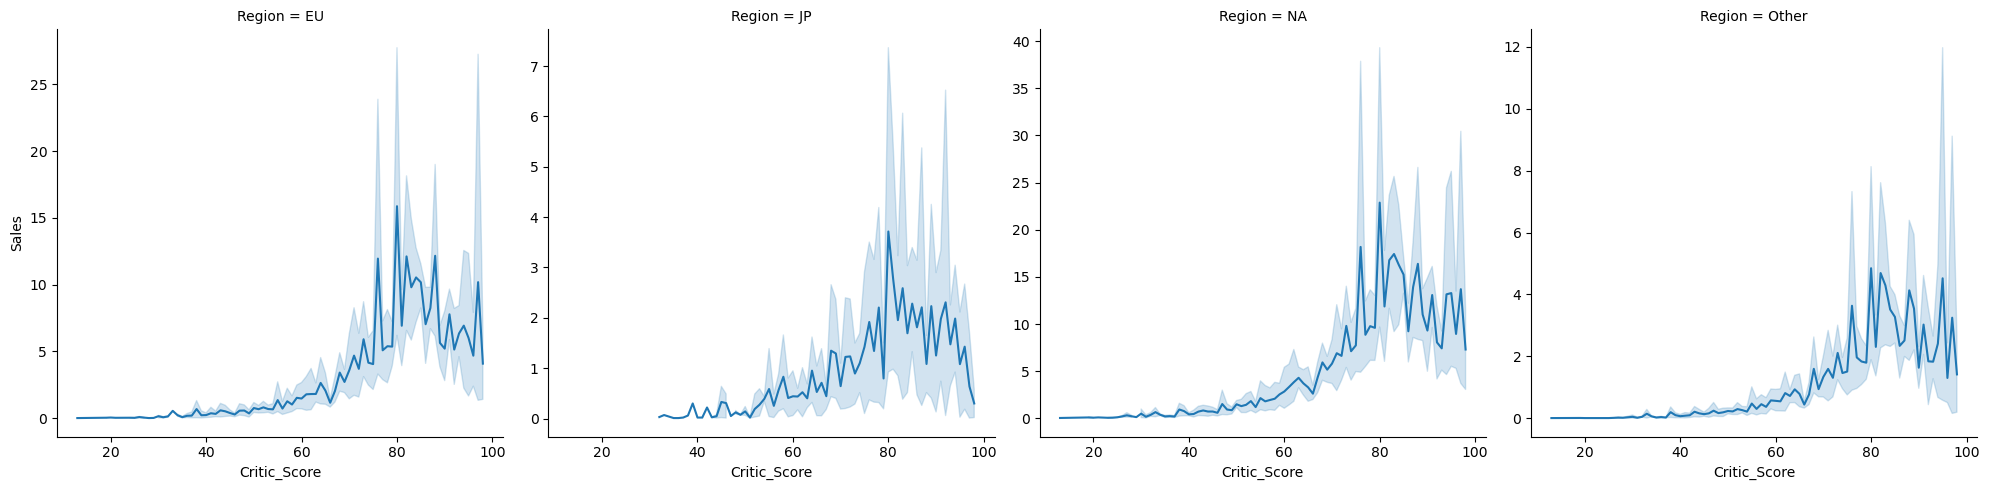

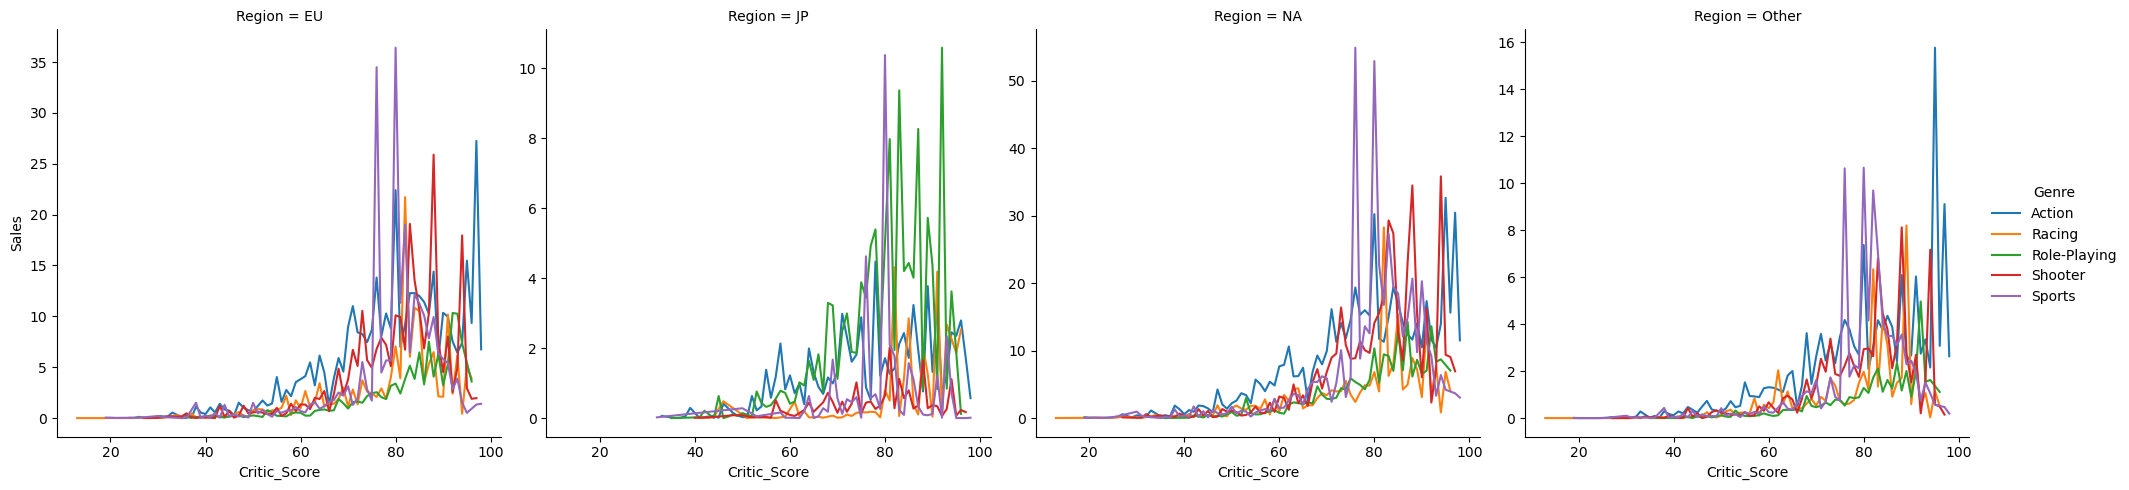

In [46]:
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales',col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales', hue = 'Genre',col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})


In [47]:
user = df[['User_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [48]:
user = user.melt( id_vars = ['User_Score','Genre'],var_name = 'Region', value_name = 'Sales')
user

,User_Score,Genre,Region,Sales
0,8.0,Sports,NA,41.36
1,8.3,Racing,NA,15.68
2,8.0,Sports,NA,15.61
3,8.5,Platform,NA,11.28
4,6.6,Misc,NA,13.96
...,...,...,...,...
27291,2.4,Action,Other,0.00
27292,8.8,Fighting,Other,0.00
27293,7.6,Action,Other,0.00
27294,5.8,Shooter,Other,0.00


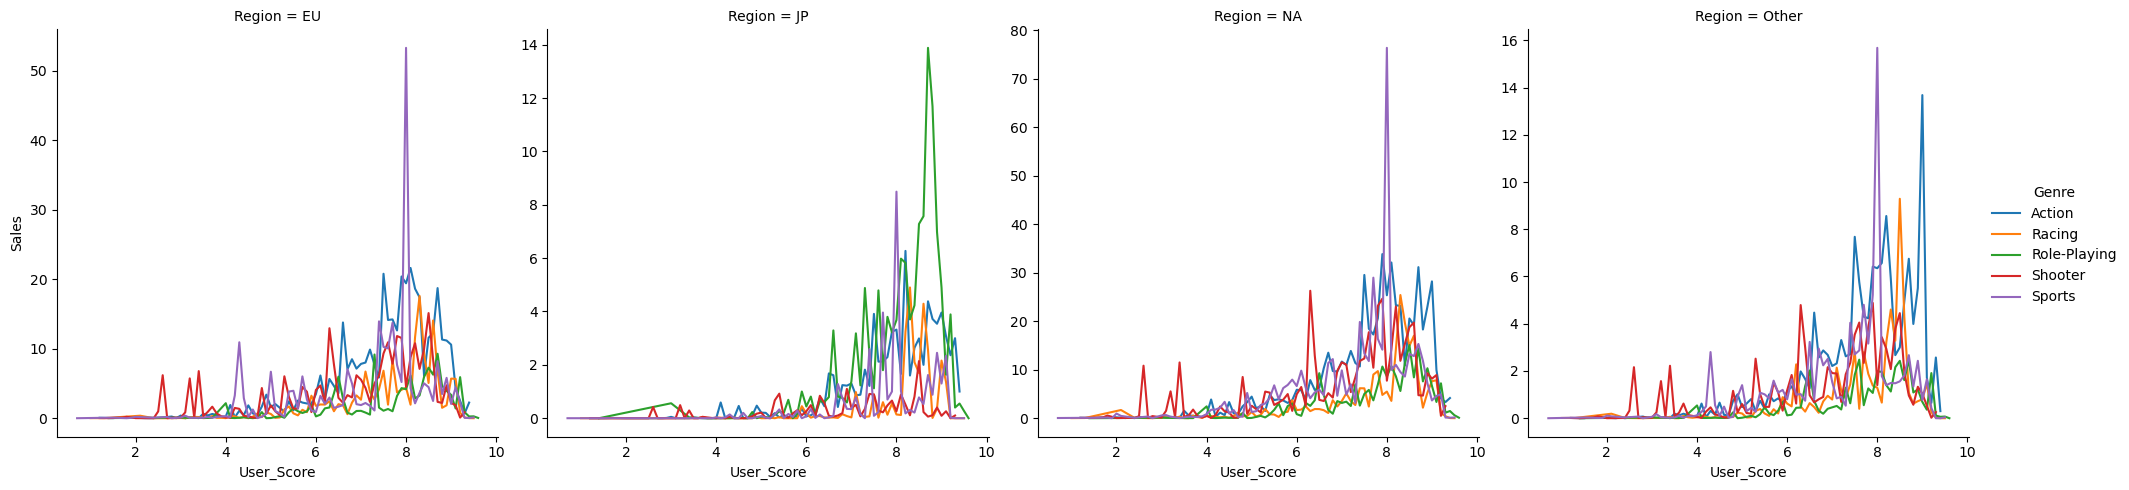

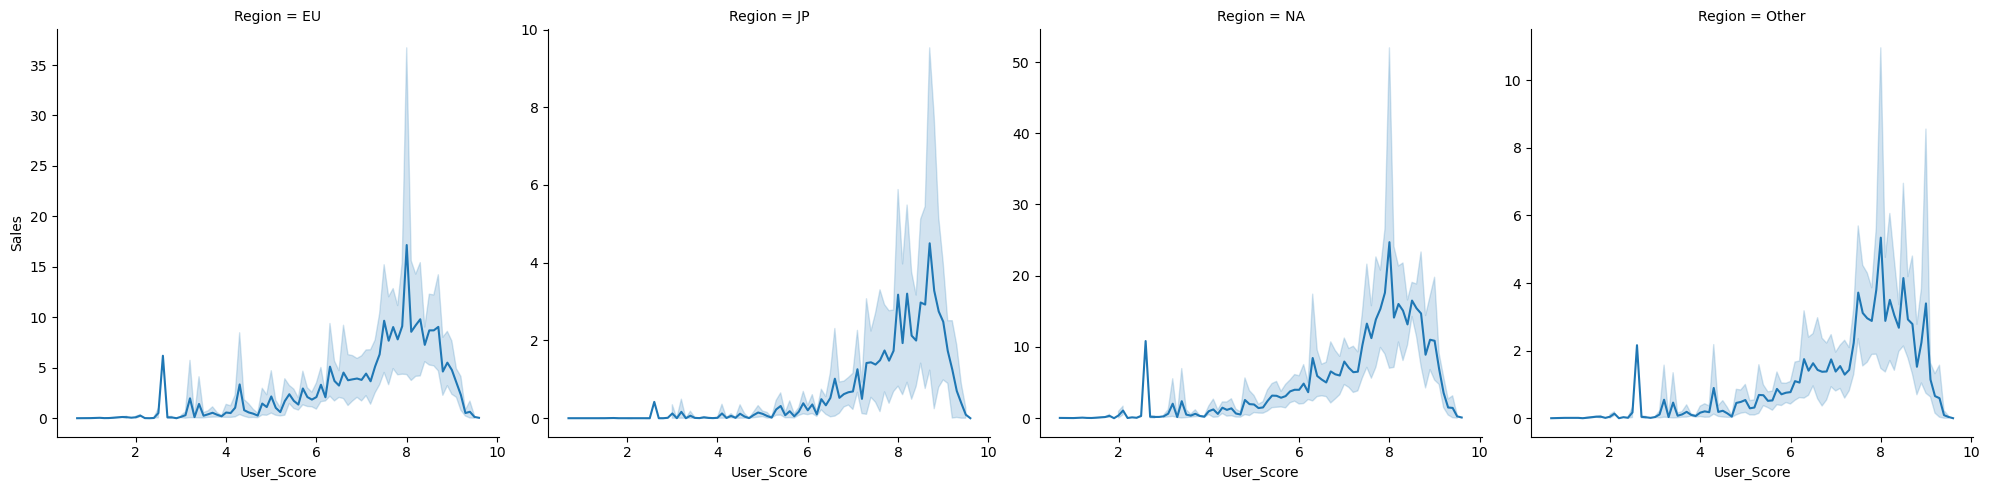

In [49]:
user = user[user['Genre'].isin(top_genre)]
critic = critic[critic['Sales'] > 0]
user_score = user.groupby(['Region','Genre','User_Score'])[['Sales']].sum().reset_index()
user_score_1 = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
user_score_2 = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})

In [89]:
critic_sales = df[['Year', 'Global', 'Name', 'Critic_Score']]

In [90]:
critic_sales_max = critic_sales[
    critic_sales.groupby('Year')['Global'].transform('max') == critic_sales['Global']
]

In [91]:
user_sales = df[['Year', 'Global', 'Name', 'User_Score']]

In [92]:
user_sales_max = user_sales[
    user_sales.groupby('Year')['Global'].transform('max') == user_sales['Global']
]
user_sales['User_Score'] = pd.to_numeric(user_sales['User_Score'], errors='coerce')

user_sales_max = user_sales_max[user_sales_max['User_Score'].notna()]

C:\Users\ystfn\AppData\Local\Temp\ipykernel_38188\1330311080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_sales['User_Score'] = pd.to_numeric(user_sales['User_Score'], errors='coerce')


In [93]:
top_games = user_sales_max[['Name', 'Global']].sort_values(by = 'Global', ascending = False).head(10)
top_games = top_games['Name'].tolist()

In [95]:
user_sales_max = user_sales_max[user_sales_max['Name'].isin(top_games)]
user_sales_max

,Year,Global,Name,User_Score
0,2006,82.53,Wii Sports,8.0
2,2008,35.52,Mario Kart Wii,8.3
3,2009,32.77,Wii Sports Resort,8.0
11,2005,23.21,Mario Kart DS,8.6
13,2007,22.70,Wii Fit,7.7
14,2010,21.81,Kinect Adventures!,6.3
16,2013,21.04,Grand Theft Auto V,8.2
17,2004,20.81,Grand Theft Auto: San Andreas,9.0
24,2002,16.15,Grand Theft Auto: Vice City,8.7
28,2001,14.98,Gran Turismo 3: A-Spec,8.4


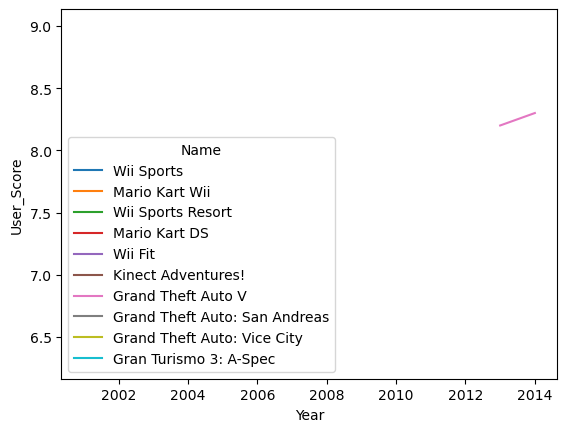

In [96]:
ax = sns.lineplot(data=user_sales_max, x="Year", y="User_Score", hue = 'Name')


In [97]:
plot_df = user_sales_max.sort_values('Year')
sns.scatterplot(
    data=plot_df, x='Year', y='User_Score',
    size='Global', sizes=(60,300), hue='Platform',  # or hue='Name'
    alpha=0.9
)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')

ValueError: Could not interpret value `Platform` for parameter `hue`

In [ ]:
ax = sns.lineplot(data=critic_sales, x="Year", y="Critic_Score")
ax.set_yticks(range(0, 11))

In [ ]:
ax = sb.lineplot(data=user_sales, x="Year", y="User_Score")
ax.set_yticks(range(0, 11))
